# Chapter 3.6: How might the virus spread in the future?

Without sufficient data, it's virtually impossible to predict exactly how the virus will spread. There are too many unknown variables: how counties will react with policy, the compliency of citizens, if and how the virus may evolve, and whether or not health care systems will be able to accomodate new cases.  
There are tools that can extrapolate out possible predictions, but the results are based on the assumption that nothing changes, which is highly unlikely. Understanding the bias that this method introduces, I used a package called curvefit to predict the course of the virus in different counties and where the infection count may cap. 

In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
from functions import calculate_infection, detection_plot, clean_deaths, clean_cases
from scipy.optimize import curve_fit

In [2]:
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
deaths_df = clean_deaths(deaths_df)

deaths_df_HR = deaths_df.iloc[362,:]
deaths_df_HR = deaths_df_HR.reset_index()

index_val = len(deaths_df_HR.index)

calculate_infection(deaths_df_HR, index_val)
deaths_df_HR = deaths_df_HR[0:-18]

# Miami-Dade County

203560.6181696336


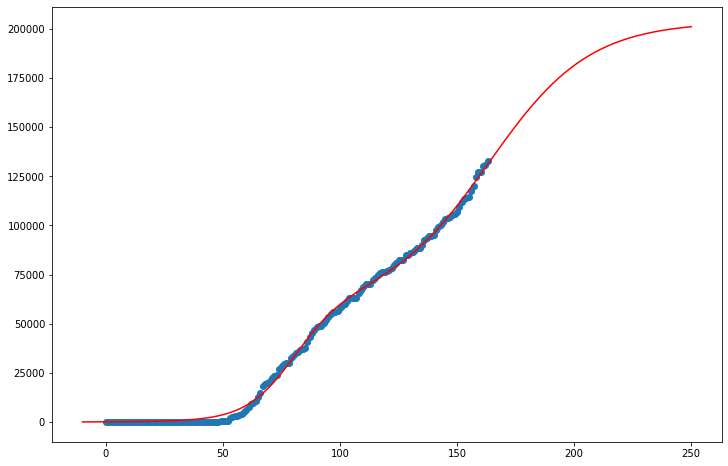

In [3]:
def logistic(x, midpoint=0, rate=.8, maximum=1):
    return maximum / (1 + np.exp(-rate * (x - midpoint)))

x = np.linspace(-6, 10, 1000)
y = logistic(x)# + logistic(x, midpoint=6, rate=2, maximum=5)



def double_log(x, x1, r1, m1, x2, r2, m2):
    return logistic(x, x1, r1, m1) + logistic(x, x2, r2, m2)


popt1, _ = curve_fit(logistic, range(0,164),  deaths_df_HR['total_infections'], p0=[0,0,0])

popt2, _ = curve_fit(double_log, range(0,164), deaths_df_HR['total_infections'], p0=[0,0,0,0,0,0])

xmodel = np.linspace(-10, 250, 1000)
ymodel1 = logistic(xmodel, *popt1)

ymodel2 = double_log(xmodel, *popt2)

plt.figure(figsize=(12,8))

plt.plot(xmodel, ymodel2, 'r')

yy = deaths_df_HR['total_infections']
xx = range(len(deaths_df_HR['total_infections']))
plt.scatter(xx,yy)


print(popt2[2] + popt2[-1])

The data points for Miami-Dade don't appear to be on a flattened trajetory yet, whereas the curvefit model suggests that Miami-Dade will reach it's maximum number of infections relatively soon. 

In [4]:
deaths_df_CK = deaths_df.iloc[610,:]
deaths_df_CK = deaths_df_CK.reset_index()

index_val = len(deaths_df_CK.index)

calculate_infection(deaths_df_CK, index_val)
deaths_df_CK = deaths_df_CK[0:-18]

# Cook County

479745.25923068443


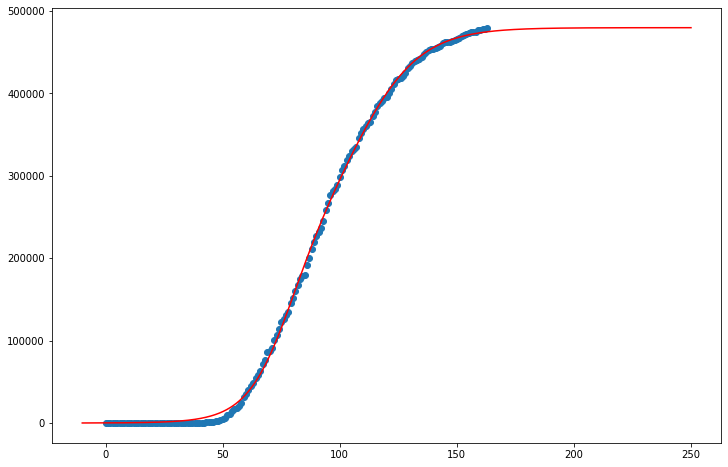

In [5]:
def logistic(x, midpoint=0, rate=.8, maximum=1):
    return maximum / (1 + np.exp(-rate * (x - midpoint)))

x = np.linspace(-6, 10, 1000)
y = logistic(x)# + logistic(x, midpoint=6, rate=2, maximum=5)



def double_log(x, x1, r1, m1, x2, r2, m2):
    return logistic(x, x1, r1, m1) + logistic(x, x2, r2, m2)


popt1, _ = curve_fit(logistic, range(0,164),  deaths_df_CK['total_infections'], p0=[0,0,0])

popt2, _ = curve_fit(double_log, range(0,164), deaths_df_CK['total_infections'], p0=[0,0,0,0,0,0])

xmodel = np.linspace(-10, 250, 1000)
ymodel1 = logistic(xmodel, *popt1)

ymodel2 = double_log(xmodel, *popt2)

plt.figure(figsize=(12,8))

plt.plot(xmodel,ymodel2, 'r')

yy = deaths_df_CK['total_infections']
xx = range(len(deaths_df_CK['total_infections']))
plt.scatter(xx,yy)


print(popt2[2] + popt2[-1])

In [6]:
deaths_df_LA = deaths_df.iloc[204,:]
deaths_df_LA = deaths_df_LA.reset_index()

index_val = len(deaths_df_LA.index)

calculate_infection(deaths_df_LA, index_val)
deaths_df_LA = deaths_df_LA[0:-18]

# Los Angeles County

462628.1408072187


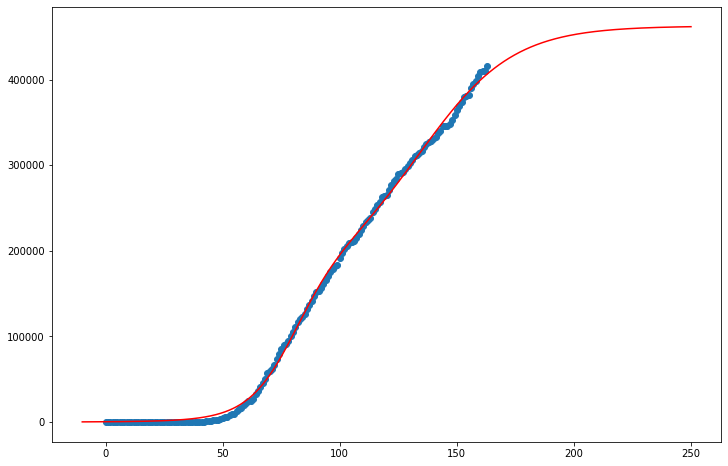

In [7]:
def logistic(x, midpoint=0, rate=.8, maximum=1):
    return maximum / (1 + np.exp(-rate * (x - midpoint)))

x = np.linspace(-6, 10, 1000)
y = logistic(x)# + logistic(x, midpoint=6, rate=2, maximum=5)



def double_log(x, x1, r1, m1, x2, r2, m2):
    return logistic(x, x1, r1, m1) + logistic(x, x2, r2, m2)


popt1, _ = curve_fit(logistic, range(0,164),  deaths_df_LA['total_infections'], p0=[0,0,0])

popt2, _ = curve_fit(double_log, range(0,164), deaths_df_LA['total_infections'], p0=[0,0,0,0,0,0], maxfev = 20000)

xmodel = np.linspace(-10, 250, 1000)
ymodel1 = logistic(xmodel, *popt1)

ymodel2 = double_log(xmodel, *popt2)

plt.figure(figsize=(12,8))

plt.plot(xmodel, ymodel2, 'r')

yy = deaths_df_LA['total_infections']
xx = range(len(deaths_df_LA['total_infections']))
plt.scatter(xx,yy)


print(popt2[2] + popt2[-1])